In [2]:
#استيراد المكتبات اللازمة
import pandas as pd


In [3]:
# تحميل ملف البيانات في إطار بيانات
df= pd.read_csv('vehicles.csv')


In [4]:
#إظهار الصفوف الأولى من إطار البيانات
print(df.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [5]:
#إظهار معلومات اطار البيانات
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'url', 'region_url','title_status', 'image_url', 'description', 'VIN','state','condition','size', 'posting_date', 'county'])

In [7]:
# Drop rows with missing values in target columns (optional)
df = df.dropna(subset=['manufacturer', 'model', 'type','fuel', 'transmission', 'region' ])

In [8]:
# Fill missing values for numerical columns
df['year'].fillna(df['year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['lat'].fillna(df['lat'].median(), inplace=True)
df['long'].fillna(df['long'].median(), inplace=True)


C:\Users\Delux Tech\AppData\Local\Temp\ipykernel_10048\2636315233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
C:\Users\Delux Tech\AppData\Local\Temp\ipykernel_10048\2636315233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316606 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        316606 non-null  object 
 1   price         316606 non-null  int64  
 2   year          316606 non-null  float64
 3   manufacturer  316606 non-null  object 
 4   model         316606 non-null  object 
 5   cylinders     210372 non-null  object 
 6   fuel          316606 non-null  object 
 7   odometer      316606 non-null  float64
 8   transmission  316606 non-null  object 
 9   drive         250569 non-null  object 
 10  type          316606 non-null  object 
 11  paint_color   255699 non-null  object 
 12  lat           316606 non-null  float64
 13  long          316606 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 36.2+ MB


In [10]:
# Fill missing values for categorical columns with mode
for col in ['cylinders',  'drive', 'paint_color']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Delux Tech\AppData\Local\Temp\ipykernel_10048\1723764946.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316606 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        316606 non-null  object 
 1   price         316606 non-null  int64  
 2   year          316606 non-null  float64
 3   manufacturer  316606 non-null  object 
 4   model         316606 non-null  object 
 5   cylinders     316606 non-null  object 
 6   fuel          316606 non-null  object 
 7   odometer      316606 non-null  float64
 8   transmission  316606 non-null  object 
 9   drive         316606 non-null  object 
 10  type          316606 non-null  object 
 11  paint_color   316606 non-null  object 
 12  lat           316606 non-null  float64
 13  long          316606 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 36.2+ MB


In [12]:
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# Assuming 'type' is the target variable and df is your DataFrame
target_column = 'type'
categorical_columns = ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 'drive', 'paint_color']

# Label Encode the target column (type) if it's not numeric
label_encoder = LabelEncoder()
df['type_numeric'] = label_encoder.fit_transform(df['type'])

# Initialize the Target Encoder
encoder = ce.TargetEncoder(cols=categorical_columns)

# Fit and transform using the numeric version of 'type'
df_encoded = encoder.fit_transform(df[categorical_columns], df['type_numeric'])

# Concatenate the encoded categorical columns with the rest of the DataFrame
df_final = pd.concat([df.drop(columns=categorical_columns), df_encoded], axis=1)

# Display the first few rows of the encoded DataFrame
print(df_final.head())


    price    year  odometer    type     lat     long  type_numeric    region  \
27  33590  2014.0   57923.0  pickup  32.590 -85.4800             8  6.253729   
28  22590  2010.0   71229.0  pickup  32.590 -85.4800             8  6.253729   
29  39590  2020.0   19160.0  pickup  32.590 -85.4800             8  6.253729   
30  30990  2017.0   41124.0  pickup  32.590 -85.4800             8  6.253729   
31  15000  2013.0  128000.0   truck  32.592 -85.5189            10  6.253729   

    manufacturer     model  cylinders      fuel  transmission     drive  \
27      6.086258  8.000000   6.905863  5.858663      6.435161  5.678360   
28      6.403634  9.041166   6.905863  5.858663      6.435161  5.678360   
29      6.403634  8.079051   6.905863  5.858663      6.435161  5.678360   
30      6.552317  8.000000   6.905863  5.858663      6.435161  5.678360   
31      6.767879  9.000000   5.842188  5.858663      6.018838  6.459517   

    paint_color  
27     6.372844  
28     5.992970  
29     5.99984

In [13]:
#إظهار معلومات اطار البيانات
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 316606 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         316606 non-null  int64  
 1   year          316606 non-null  float64
 2   odometer      316606 non-null  float64
 3   type          316606 non-null  object 
 4   lat           316606 non-null  float64
 5   long          316606 non-null  float64
 6   type_numeric  316606 non-null  int32  
 7   region        316606 non-null  float64
 8   manufacturer  316606 non-null  float64
 9   model         316606 non-null  float64
 10  cylinders     316606 non-null  float64
 11  fuel          316606 non-null  float64
 12  transmission  316606 non-null  float64
 13  drive         316606 non-null  float64
 14  paint_color   316606 non-null  float64
dtypes: float64(12), int32(1), int64(1), object(1)
memory usage: 37.4+ MB
None


In [14]:
print(df_final.head())



    price    year  odometer    type     lat     long  type_numeric    region  \
27  33590  2014.0   57923.0  pickup  32.590 -85.4800             8  6.253729   
28  22590  2010.0   71229.0  pickup  32.590 -85.4800             8  6.253729   
29  39590  2020.0   19160.0  pickup  32.590 -85.4800             8  6.253729   
30  30990  2017.0   41124.0  pickup  32.590 -85.4800             8  6.253729   
31  15000  2013.0  128000.0   truck  32.592 -85.5189            10  6.253729   

    manufacturer     model  cylinders      fuel  transmission     drive  \
27      6.086258  8.000000   6.905863  5.858663      6.435161  5.678360   
28      6.403634  9.041166   6.905863  5.858663      6.435161  5.678360   
29      6.403634  8.079051   6.905863  5.858663      6.435161  5.678360   
30      6.552317  8.000000   6.905863  5.858663      6.435161  5.678360   
31      6.767879  9.000000   5.842188  5.858663      6.018838  6.459517   

    paint_color  
27     6.372844  
28     5.992970  
29     5.99984

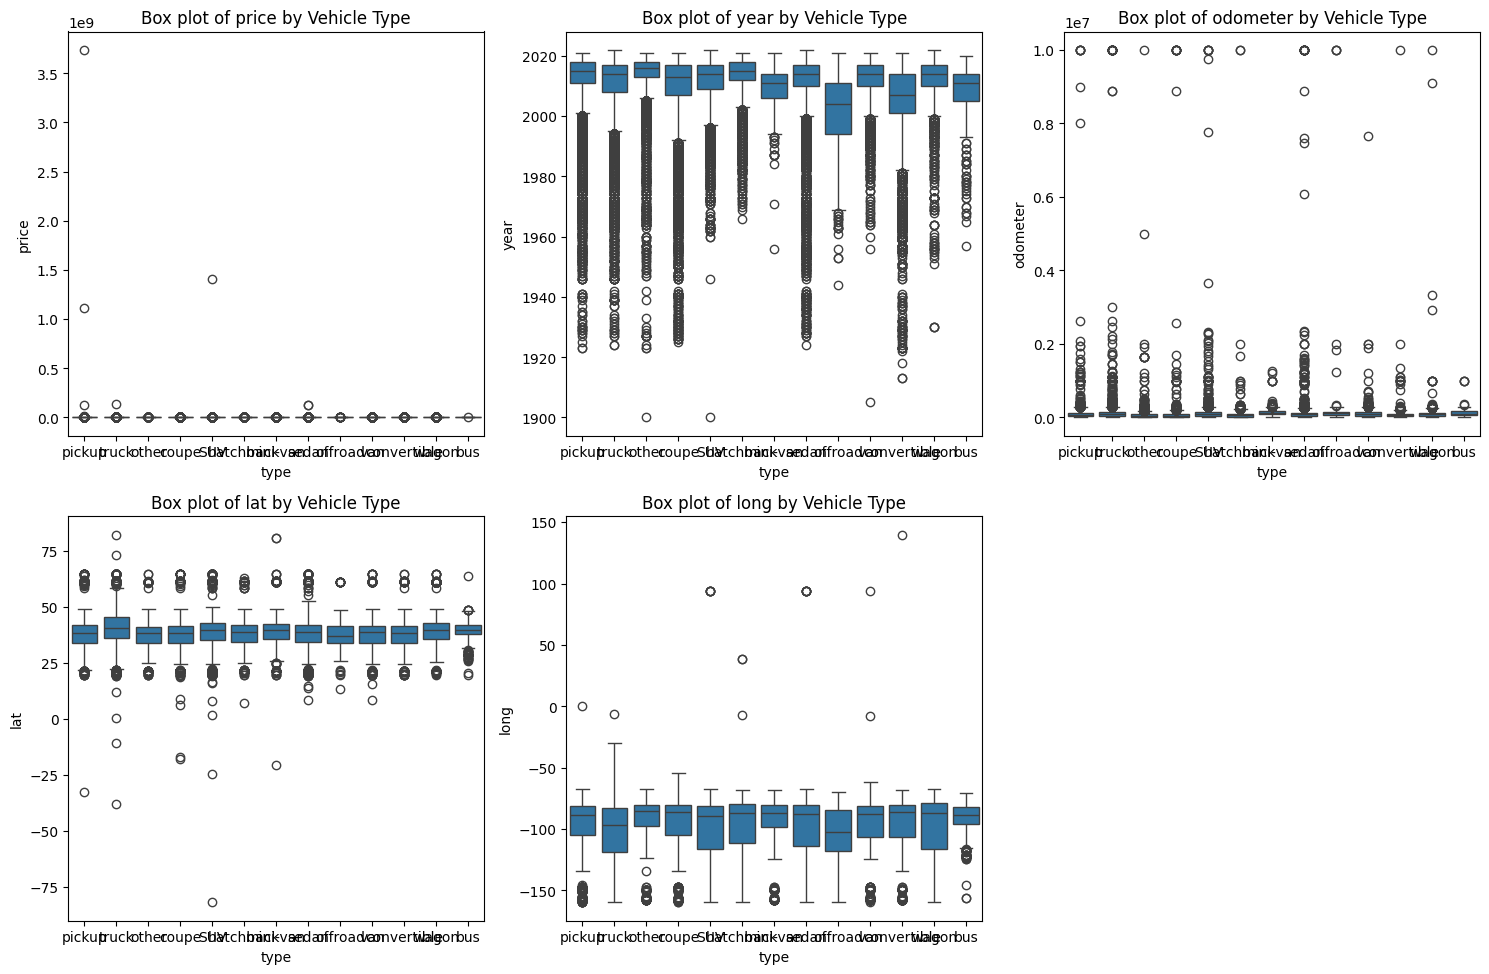

In [15]:
#Box Plots for Numeric Columns
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric columns
numeric_columns = ['price', 'year', 'odometer', 'lat', 'long']

# Plot box plots for each numeric feature against the target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='type', y=column)
    plt.title(f'Box plot of {column} by Vehicle Type')
plt.tight_layout()
plt.show()


C:\Users\Delux Tech\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


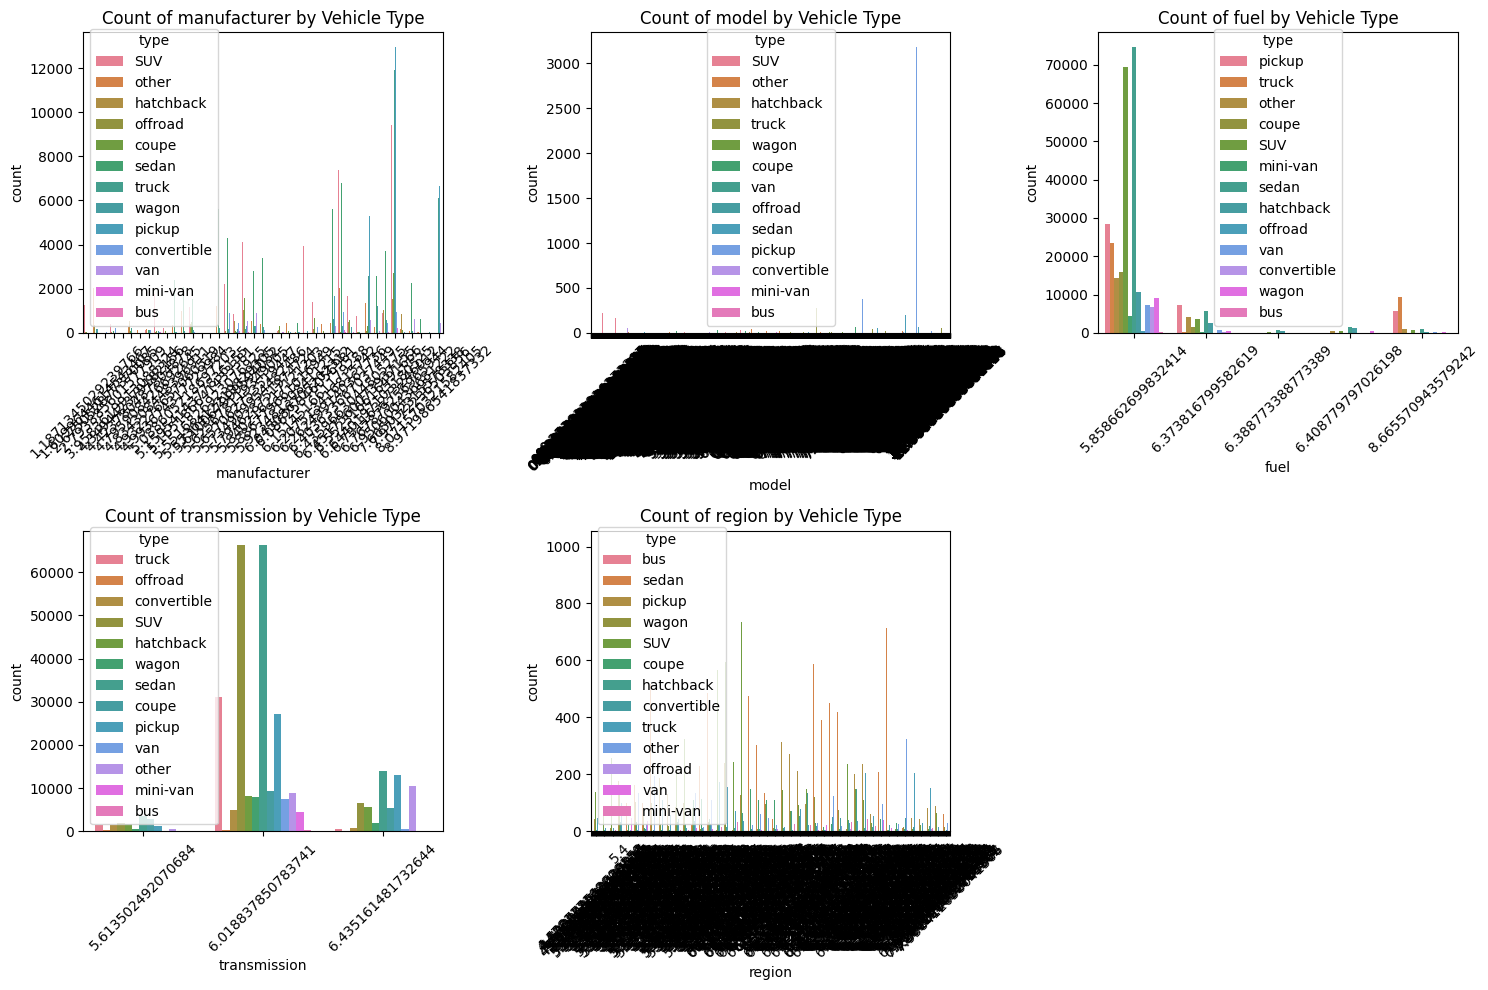

In [19]:
# Count plot for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['manufacturer', 'model', 'fuel', 'transmission','region'], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='type', data=df_final)
    plt.title(f'Count of {col} by Vehicle Type')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


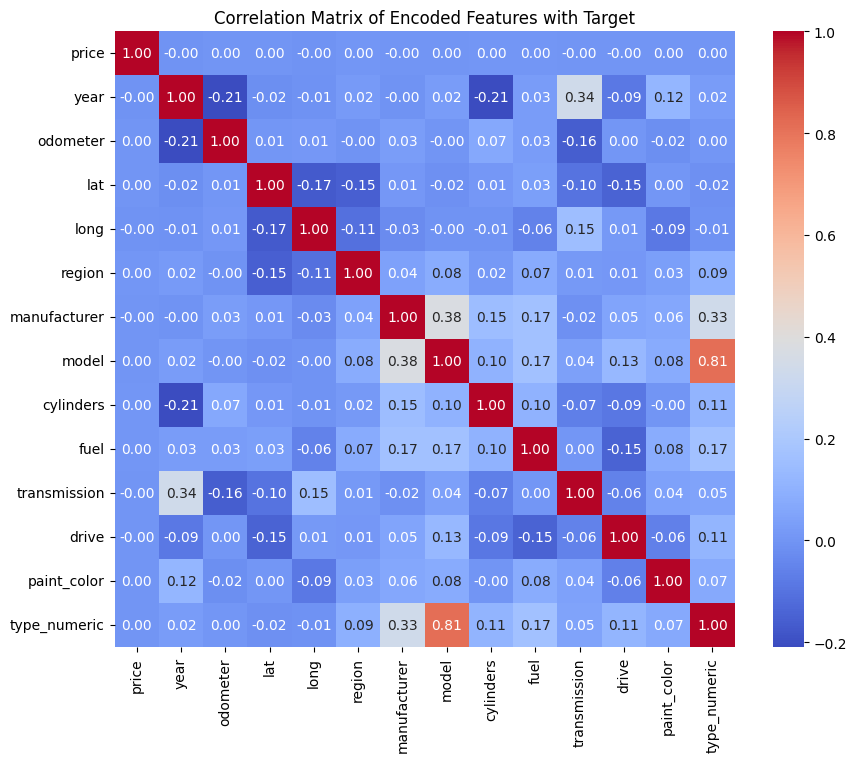

In [20]:
# Target Encoding and Correlation Plot
import category_encoders as ce

# Target Encoding for categorical columns
encoder = ce.TargetEncoder(cols=categorical_columns)
df_encoded = encoder.fit_transform(df[categorical_columns], df['type_numeric'])  # Assuming 'type_numeric' is the label-encoded target

# Concatenate the encoded columns with the numeric features
df_final = pd.concat([df[numeric_columns], df_encoded], axis=1)
df_final['type_numeric'] = df['type_numeric']  # Adding the encoded target back

# Calculate and plot correlation matrix
correlation_matrix = df_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Encoded Features with Target")
plt.show()


In [21]:
#Pivot Table and Aggregation
# Example: Average 'price' for each type of vehicle, grouped by 'fuel' type
pivot_table = df.pivot_table(values='price', index='fuel', columns='type', aggfunc='mean')
print(pivot_table)



type               SUV           bus   convertible         coupe  \
fuel                                                               
diesel    1.796630e+06  14673.634146  19748.866667  16884.818182   
electric  3.405893e+04           NaN  20000.000000  17546.555556   
gas       1.554297e+04  13530.708661  19750.292264  21120.143729   
hybrid    2.100690e+04           NaN  35124.945946  15581.538462   
other     2.471918e+04  19829.300000  27801.744108  29210.101225   

type         hatchback      mini-van       offroad         other  \
fuel                                                               
diesel    20760.458333  15231.294118  22040.181818  17952.987132   
electric  15011.105788           NaN           NaN  18031.674419   
gas       13272.746633   9132.490227  15637.838095  24588.494723   
hybrid    11954.145706  12737.500000           NaN  20927.994521   
other     20990.900616   9511.637681      0.000000  28078.892961   

type             pickup         sedan         

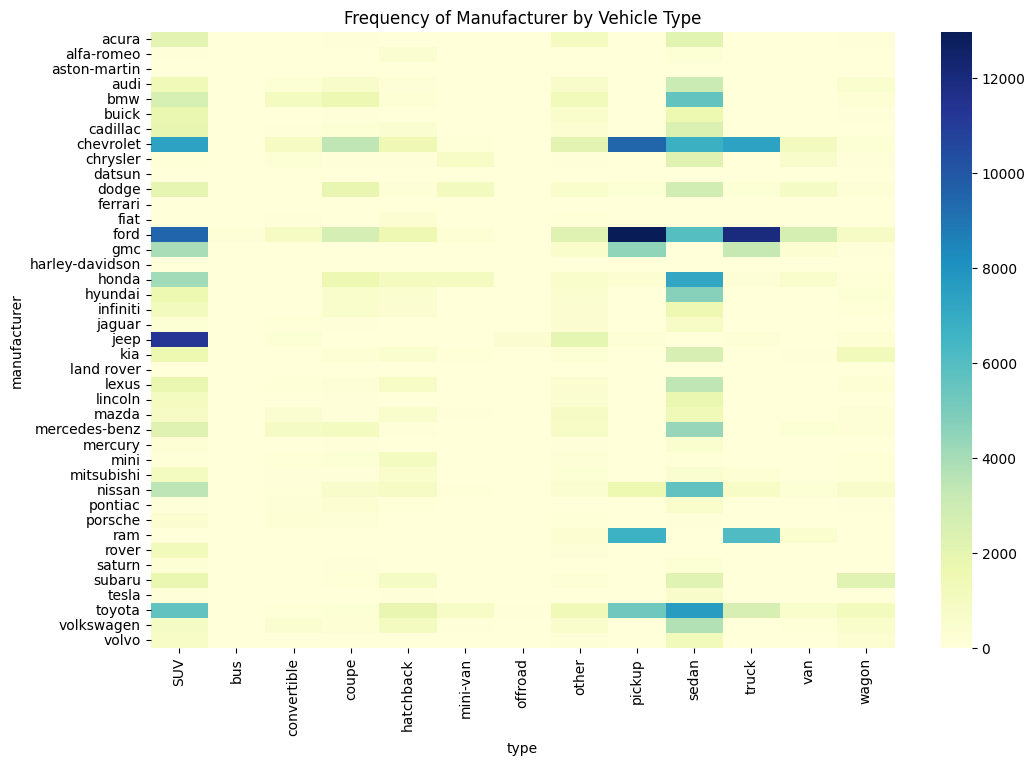

In [27]:
#Heatmap of Frequencies
# Heatmap of the frequency of each 'manufacturer' for each type
manufacturer_counts = pd.crosstab(df['manufacturer'], df['type'])
plt.figure(figsize=(12, 8))
sns.heatmap(manufacturer_counts, cmap="YlGnBu", annot=False)
plt.title("Frequency of Manufacturer by Vehicle Type")
plt.show()


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316606 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         316606 non-null  int64  
 1   year          316606 non-null  float64
 2   odometer      316606 non-null  float64
 3   lat           316606 non-null  float64
 4   long          316606 non-null  float64
 5   region        316606 non-null  float64
 6   manufacturer  316606 non-null  float64
 7   model         316606 non-null  float64
 8   cylinders     316606 non-null  float64
 9   fuel          316606 non-null  float64
 10  transmission  316606 non-null  float64
 11  drive         316606 non-null  float64
 12  paint_color   316606 non-null  float64
 13  type_numeric  316606 non-null  int32  
dtypes: float64(12), int32(1), int64(1)
memory usage: 35.0 MB


In [34]:
# Drop irrelevant columns
df_final = df_final.drop(columns=['price', 'year', 'odometer', 'lat', 'long', 'region', 'transmission', 'paint_color'])

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316606 entries, 27 to 426879
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   manufacturer  316606 non-null  float64
 1   model         316606 non-null  float64
 2   cylinders     316606 non-null  float64
 3   fuel          316606 non-null  float64
 4   drive         316606 non-null  float64
 5   type_numeric  316606 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 15.7 MB


In [42]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df and target column is 'type_numeric'
X = df.drop(columns=['type_numeric'])  # Features
y = df['type_numeric']  # Target

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (253284, 5)
Testing set size: (63322, 5)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed for convergence

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6009759641198952
Precision: 0.5554752053030426
Recall: 0.6009759641198952
F1 Score: 0.5459865504723973

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81     14876
           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00      1393
           3       0.53      0.30      0.39      3446
           4       0.49      0.27      0.34      3041
           5       0.25      0.00      0.00       920
           6       0.00      0.00      0.00       105
           7       0.43      0.18      0.25      4067
           8       0.46      0.48      0.47      8405
           9       0.59      0.87      0.70     16589
          10       0.59      0.47      0.52      6717
          11       1.00      0.00      0.01      1634
          12       0.00      0.00      0.00      2066

    accuracy                           0.60     63322
   macro avg       0.39      0.27      0.27     

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8461198319699315
Precision: 0.8429270596921878
Recall: 0.8461198319699315
F1 Score: 0.8420654514294496

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     14876
           1       0.67      0.46      0.55        63
           2       0.80      0.63      0.71      1393
           3       0.82      0.80      0.81      3446
           4       0.82      0.76      0.79      3041
           5       0.66      0.86      0.75       920
           6       0.48      0.21      0.29       105
           7       0.80      0.61      0.69      4067
           8       0.81      0.81      0.81      8405
           9       0.91      0.96      0.93     16589
          10       0.76      0.76      0.76      6717
          11       0.84      0.75      0.79      1634
          12       0.72      0.51      0.60      2066

    accuracy                           0.85     63322
   macro avg       0.77      0.70      0.72     6

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5649537285619531
Precision: 0.5536851988701811
Recall: 0.5649537285619531
F1 Score: 0.5246674402246875

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     14876
           1       0.11      0.05      0.07        63
           2       0.12      0.00      0.01      1393
           3       0.35      0.50      0.41      3446
           4       0.29      0.43      0.34      3041
           5       0.18      0.33      0.23       920
           6       0.00      0.00      0.00       105
           7       0.23      0.02      0.04      4067
           8       0.54      0.31      0.39      8405
           9       0.58      0.88      0.70     16589
          10       0.53      0.39      0.45      6717
          11       0.35      0.13      0.18      1634
          12       1.00      0.11      0.19      2066

    accuracy                           0.56     63322
   macro avg       0.39      0.30      0.29     6